In [1]:
!pip install scipy

In [2]:
!pip install researchpy

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [4]:
bike_data = pd.read_csv('../../datasets/day.csv')

bike_data.shape

(731, 16)

In [5]:
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_data = bike_data[['season',
                       'mnth',
                       'holiday',
                       'workingday',
                       'weathersit',
                       'temp',
                       'cnt']]

In [7]:
bike_data.to_csv('../../datasets/bike_data_pro.csv', index=False)

In [8]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [9]:
bike_data['season'].unique()

array([1, 2, 3, 4])

In [11]:
bike_data['workingday'].unique()

array([0, 1])

In [12]:
bike_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [13]:
bike_data.shape

(731, 7)

In [14]:
bike_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


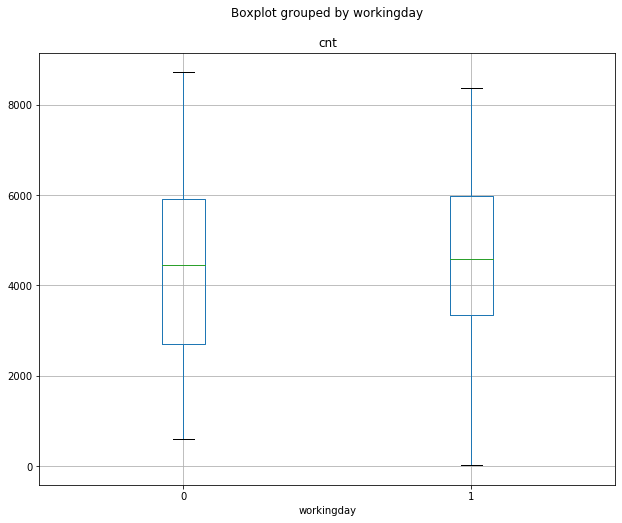

In [16]:
bike_data.boxplot(column=['cnt'], by='workingday', figsize=(10,8));

In [17]:
sample_01 = bike_data[(bike_data['workingday'] == 1)]
sample_02 = bike_data[(bike_data['workingday'] == 0)]

In [18]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [19]:
sample_01 = sample_01.sample(231)

In [20]:
sample_01.shape, sample_02.shape

((231, 7), (231, 7))